# import data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = "serif"
file_path ='/Users/liu/Desktop/Pitts/Project/data/R3_1971_YE_ENCOUNTER_NOTES_2021_03_05/R3_1971_YE_ENCOUNTERS_2021_03_01.csv'


# exploration

In [ ]:
ENCOUNTERS = pd.read_csv(file_path,encoding = "ISO-8859-1",low_memory=False)
# print(DEMOGRAPHICS.GENDER.value_counts())
ENCOUNTERS['START_DATE'] = pd.to_datetime(ENCOUNTERS['START_DATE'], format='%m/%d/%Y')
ENCOUNTERS['END_DATE'] = pd.to_datetime(ENCOUNTERS['END_DATE'], format='%m/%d/%Y')

In [188]:
ENCOUNTERS[ENCOUNTERS.LOCATION=='EXTERNAL DEPARTMENT'].head(20)


STUDY_ID START_DATE END_DATE       ENC_TYPE             LOCATION  \
20  5220030820 2011-02-14      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
24  5222157407 2011-03-02      NaT      ER REPORT  EXTERNAL DEPARTMENT   
33  5222305102 2011-03-05      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
36  5222579657 2011-02-03      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
37  5222134202 2011-02-26      NaT      ER REPORT  EXTERNAL DEPARTMENT   
38  5222799993 2011-02-27      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
40  5222644125 2011-02-03      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
41  5222676740 2011-02-27      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
43  5225070863 2011-04-04      NaT      ER REPORT  EXTERNAL DEPARTMENT   
44  5220573827 2011-04-06      NaT      ER REPORT  EXTERNAL DEPARTMENT   
47  5225623042 2011-01-22      NaT        IMAGING  EXTERNAL DEPARTMENT   
48  5222034345 2011-01-14      NaT      ER REPORT  EXTERNAL DEPARTMENT   
49  5222773522 2011-02-23      NaT      ER REPORT  EXTERNAL DEPARTMENT   
50  5222773522 2011-02-23      NaT  INPATIENT H&P  EXTERNAL DEPARTMENT   
51  5222065847 2011-02-04      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
54  5221989285 2011-02-15      NaT  INPATIENT H&P  EXTERNAL DEPARTMENT   
56  5225688747 2011-01-24      NaT    LAB RESULTS  EXTERNAL DEPARTMENT   
57  5222429965 2011-03-25      NaT            EKG  EXTERNAL DEPARTMENT   
61  5222971882 2011-01-04      NaT        IMAGING  EXTERNAL DEPARTMENT   
63  5222824389 2011-02-04      NaT      ER REPORT  EXTERNAL DEPARTMENT   

   APPT_STATUS ADMIT_SOURCE HOSPITAL_SERVICE PATIENT_TYPE PATIENT_CLASS  \
20         NaN          NaN              NaN          NaN           NaN   
24         NaN          NaN              NaN          NaN           NaN   
33         NaN          NaN              NaN          NaN           NaN   
36         NaN          NaN              NaN          NaN           NaN   
37         NaN          NaN              NaN          NaN           NaN   
38         NaN          NaN              NaN          NaN           NaN   
40         NaN          NaN              NaN          NaN           NaN   
41         NaN          NaN              NaN          NaN           NaN   
43         NaN          NaN              NaN          NaN           NaN   
44         NaN          NaN              NaN          NaN           NaN   
47         NaN          NaN              NaN          NaN           NaN   
48         NaN          NaN              NaN          NaN           NaN   
49         NaN          NaN              NaN          NaN           NaN   
50         NaN          NaN              NaN          NaN           NaN   
51         NaN          NaN              NaN          NaN           NaN   
54         NaN          NaN              NaN          NaN           NaN   
56         NaN          NaN              NaN          NaN           NaN   
57         NaN          NaN              NaN          NaN           NaN   
61         NaN          NaN              NaN          NaN           NaN   
63         NaN          NaN              NaN          NaN           NaN   

   CHIEF_COMPLAINT CHIEF_COMPLAINT_ONSET_DATE time day  
20             NaN                        NaN           
24             NaN                        NaN           
33             NaN                        NaN           
36             NaN                        NaN           
37             NaN                        NaN           
38             NaN                        NaN           
40             NaN                        NaN           
41             NaN                        NaN           
43             NaN                        NaN           
44             NaN                        NaN           
47             NaN                        NaN           
48             NaN                        NaN           
49             NaN                        NaN           
50             NaN                        NaN           
51             NaN  

In [180]:
tem = list(ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE)
day = [i.split(' ')[0] if pd.notna(i) else '' for i in tem]
time = [i.split(' ')[1] if pd.notna(i) else '' for i in tem]


ENCOUNTERS['time'] = time
ENCOUNTERS['day'] = day
     



In [182]:
ENCOUNTERS['day'] = pd.to_datetime(ENCOUNTERS['day'], format='%m/%d/%Y')



ValueError: time data '' does not match format '%m/%d/%Y' (match)

1.2.1	Summative analysis for each of elements 

In [3]:
ENCOUNTERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995731 entries, 0 to 1995730
Data columns (total 12 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   STUDY_ID                    int64         
 1   START_DATE                  datetime64[ns]
 2   END_DATE                    datetime64[ns]
 3   ENC_TYPE                    object        
 4   LOCATION                    object        
 5   APPT_STATUS                 object        
 6   ADMIT_SOURCE                object        
 7   HOSPITAL_SERVICE            object        
 8   PATIENT_TYPE                object        
 9   PATIENT_CLASS               object        
 10  CHIEF_COMPLAINT             object        
 11  CHIEF_COMPLAINT_ONSET_DATE  object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 182.7+ MB


#### 1.2.1.1	number of patients in this table (unique study_id): 

In [4]:
print('the number of records: ',ENCOUNTERS.shape[0])
print('the number of patients: ', ENCOUNTERS.STUDY_ID.nunique())
print('how many records each patient has(on average):',ENCOUNTERS.shape[0]/ENCOUNTERS.STUDY_ID.nunique())

the number of records:  1995731
the number of patients:  117672
how many records each patient has(on average): 16.960117954993542


In [5]:
ENCOUNTERS.STUDY_ID.isna().sum()

0

In [6]:
ENCOUNTERS.describe(include = 'all')

/var/folders/pp/qtk1lyns6zg8x9dlj6f5xvtm0000gn/T/ipykernel_55104/198379608.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ENCOUNTERS.describe(include = 'all')


STUDY_ID           START_DATE             END_DATE     ENC_TYPE  \
count   1.995731e+06              1995731               166798      1995728   
unique           NaN                 3643                 3536          150   
top              NaN  2020-11-30 00:00:00  2020-11-30 00:00:00  LAB RESULTS   
freq             NaN                 6396                  466       406279   
first            NaN  2011-01-01 00:00:00  2011-01-01 00:00:00          NaN   
last             NaN  2021-01-31 00:00:00  2021-02-16 00:00:00          NaN   
mean    5.223098e+09                  NaN                  NaN          NaN   
std     1.815078e+06                  NaN                  NaN          NaN   
min     5.220000e+09                  NaN                  NaN          NaN   
25%     5.222143e+09                  NaN                  NaN          NaN   
50%     5.222740e+09                  NaN                  NaN          NaN   
75%     5.225087e+09                  NaN                  NaN          NaN   
max     5.229273e+09                  NaN                  NaN          NaN   

                   LOCATION APPT_STATUS        ADMIT_SOURCE  \
count               1989056       91463              182802   
unique                 2959           8                  19   
top     EXTERNAL DEPARTMENT   COMPLETED  MED STAFF REFERRAL   
freq                1105049       42251              170669   
first                   NaN         NaN                 NaN   
last                    NaN         NaN                 NaN   
mean                    NaN         NaN                 NaN   
std                     NaN         NaN                 NaN   
min                     NaN         NaN                 NaN   
25%                     NaN         NaN                 NaN   
50%                     NaN         NaN                 NaN   
75%                     NaN         NaN                 NaN   
max                     NaN         NaN                 NaN   

          HOSPITAL_SERVICE    PATIENT_TYPE         PATIENT_CLASS  \
count               182802          182753                182802   
unique                  58              45                     5   
top     EMERGENCY MEDICINE  EMERGENCY DEPT  Emergency Department   
freq                 75242           97420                 97445   
first                  NaN             NaN                   NaN   
last                   NaN             NaN                   NaN   
mean                   NaN             NaN                   NaN   
std                    NaN             NaN                   NaN   
min                    NaN             NaN                   NaN   
25%                    NaN             NaN                   NaN   
50%                    NaN             NaN                   NaN   
75%                    NaN             NaN                   NaN   
max                    NaN             NaN                   NaN   

       CHIEF_COMPLAINT CHIEF_COMPLAINT_ONSET_DATE  
count           181450                     181492  
unique           74099                     164729  
top              FEVER             01-DEC-20 0800  
freq              9844                         24  
first              NaN                        NaN  
last               NaN                        NaN  
mean               NaN                        NaN  
std                NaN                        NaN  
min                NaN                        NaN  
25%                NaN                        NaN  
50%                NaN                        NaN  
75%                NaN                        NaN  
max                NaN                        NaN

#### 1.2.1.2	START_DATE: date range

In [7]:
ENCOUNTERS['START_DATE'].isna().sum()

0

In [8]:
ENCOUNTERS['START_DATE'].min().date()

datetime.date(2011, 1, 1)

In [9]:
ENCOUNTERS['START_DATE'].max().date()


datetime.date(2021, 1, 31)

In [10]:
(ENCOUNTERS['START_DATE'].max().date()-ENCOUNTERS['START_DATE'].min().date()).days

3683

1.2.1.3	END_DATE: date range

In [11]:
ENCOUNTERS['END_DATE'].isna().sum()

1828933

In [12]:
ENCOUNTERS['END_DATE'].isna().sum()*100/ENCOUNTERS['END_DATE'].shape[0]

91.64226040483412

In [13]:
ENCOUNTERS['END_DATE'].min().date()

datetime.date(2011, 1, 1)

In [14]:
ENCOUNTERS['END_DATE'].max().date()

datetime.date(2021, 2, 16)

In [15]:
(ENCOUNTERS['END_DATE'].max().date()-ENCOUNTERS['END_DATE'].min().date()).days

3699

#### duration 

In [16]:
all_exist_ENCOUNTERS = ENCOUNTERS[ENCOUNTERS['START_DATE'].notna()].copy()
all_exist_ENCOUNTERS = all_exist_ENCOUNTERS[all_exist_ENCOUNTERS['END_DATE'].notna()]
all_exist_ENCOUNTERS['duration'] = all_exist_ENCOUNTERS.END_DATE-all_exist_ENCOUNTERS.START_DATE


In [17]:
temp= all_exist_ENCOUNTERS.duration.value_counts()*100/all_exist_ENCOUNTERS.duration.value_counts().sum()
temp=temp.sort_index()

In [18]:
temp

0 days      41.878200
1 days      13.612873
2 days       9.649996
3 days       8.076835
4 days       6.018657
              ...    
175 days     0.000600
193 days     0.000600
207 days     0.000600
209 days     0.000600
292 days     0.000600
Name: duration, Length: 123, dtype: float64

In [19]:
temp[:10].sum()

92.74032062734565

------
#### 1.2.1.4	ENC_TYPE: categories and frequency of each category, such as Number of ED encounters (ENC_TYPE=EMERGENCY) and Number of hospital encounters (ENC_TYPE=HOSPITAL-ENCOUNTER)

In [20]:
print('the number of Nan in ENC_TYPE column: ',ENCOUNTERS['ENC_TYPE'].isna().sum())


the number of Nan in ENC_TYPE column:  3


In [21]:
print('the number of unique ENC_TYPE:',ENCOUNTERS.ENC_TYPE.nunique())

the number of unique ENC_TYPE: 150


In [22]:
print('the percentage of each value of ENC_TYPE(descent): ')
a = ENCOUNTERS['ENC_TYPE'].value_counts()*100/ENCOUNTERS['ENC_TYPE'].notna().sum()
a = a.sort_values(ascending=False)
print(a)

the percentage of each value of ENC_TYPE(descent): 
LAB RESULTS           20.357433
IMAGING               10.544172
ER REPORT              7.157739
HOSPITAL-ENCOUNTER     5.684242
IP CONSULT             5.527557
                        ...    
PACT TELEPHONE         0.000050
MOTHER BABY LINK       0.000050
CRNP                   0.000050
DIABETES EDUCATION     0.000050
EMAIL                  0.000050
Name: ENC_TYPE, Length: 150, dtype: float64


In [23]:
print('percentage')
print('EMERGENCY:',a['EMERGENCY'])
print('HOSPITAL-ENCOUNTER:',a['HOSPITAL-ENCOUNTER'])
print('which type get the largest proportion(%): ',a.index[0],'--',a[0])
print('which type get the largest proportion(%): ',a.index[-1],'--',a[-1])

percentage
EMERGENCY: 4.8826794032052465
HOSPITAL-ENCOUNTER: 5.684241539929289
which type get the largest proportion(%):  LAB RESULTS -- 20.357433477908813
which type get the largest proportion(%):  EMAIL -- 5.010702861311762e-05


#### 1.2.1.5	LOCATION

In [24]:
print('the number of NaN in location columns:',ENCOUNTERS.LOCATION.isna().sum())
tem = ENCOUNTERS.LOCATION.isna().sum()*100/ENCOUNTERS.LOCATION.shape[0]
print('the percentage of Nan in Location column:',tem)


the number of NaN in location columns: 6675
the percentage of Nan in Location column: 0.334463913222774


In [25]:
print('the number of unique location:',ENCOUNTERS.LOCATION.nunique())


the number of unique location: 2959


In [26]:
print('the percentage of each location(%):')
prec = ENCOUNTERS.LOCATION.value_counts()*100 / ENCOUNTERS.LOCATION.notna().sum()
prec = prec.sort_values(ascending=False)
print(prec)

the percentage of each location(%):
EXTERNAL DEPARTMENT       55.556455
CHILDREN'S HOSPITAL        3.769527
CHILDRENS HOSPITAL         1.806234
UPMC INPATIENT             1.184230
ALTOONA                    1.163567
                            ...    
UPA NEPHROLOGY JHNSTWN     0.000050
UPA PULM PHONE CONSULT     0.000050
HEM/ONC SHADYSIDE INPT     0.000050
SIVA KEDARNATH BELLVUE     0.000050
CRS ERIE WEST 26 OT        0.000050
Name: LOCATION, Length: 2959, dtype: float64


more than half of data coms from EXTERNAL `EXTERNAL DEPARTMENT`

In [27]:
print('which local get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which local get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

which local get the largest proportion(%):  EXTERNAL DEPARTMENT : 55.55645492132952
which local get the smallest proportion(%):  CRS ERIE WEST 26 OT : 5.027510537662087e-05


#### 1.2.1.6	APPT_STATUS

In [28]:
print('the number of Nan in APPT_STATUS column: ',ENCOUNTERS['APPT_STATUS'].isna().sum())
tem = ENCOUNTERS.APPT_STATUS.isna().sum()*100/ENCOUNTERS.APPT_STATUS.shape[0]
print('the percentage of Nan in APPT_STATUS column:',tem)

the number of Nan in APPT_STATUS column:  1904268
the percentage of Nan in APPT_STATUS column: 95.41706773107197


In [29]:
print('the number of unique APPT_STATUS:',ENCOUNTERS.APPT_STATUS.nunique())

the number of unique APPT_STATUS: 8


In [30]:

ENCOUNTERS.APPT_STATUS.value_counts()

COMPLETED               42251
CANCELED                36512
NO SHOW                 10176
UNRESOLVED               2128
ADMITTED TO HOSPITAL      275
LEFT WITHOUT SEEN          83
ARRIVED                    36
SCHEDULED                   2
Name: APPT_STATUS, dtype: int64

In [31]:
prec = ENCOUNTERS.APPT_STATUS.value_counts()*100/ENCOUNTERS.APPT_STATUS.value_counts().sum()
print('the percentage of each APPT_STATUS(%):')
prec

the percentage of each APPT_STATUS(%):


COMPLETED               46.194636
CANCELED                39.919968
NO SHOW                 11.125810
UNRESOLVED               2.326624
ADMITTED TO HOSPITAL     0.300668
LEFT WITHOUT SEEN        0.090747
ARRIVED                  0.039360
SCHEDULED                0.002187
Name: APPT_STATUS, dtype: float64

In [32]:
print('which local get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which local get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

which local get the largest proportion(%):  COMPLETED : 46.19463608235024
which local get the smallest proportion(%):  SCHEDULED : 0.002186676579600494


#### 1.2.1.7	ADMIT_SOURCE

In [33]:
print('the number of Nan in ADMIT_SOURCE column: ',ENCOUNTERS['ADMIT_SOURCE'].isna().sum())
tem = ENCOUNTERS.ADMIT_SOURCE.isna().sum()*100/ENCOUNTERS.ADMIT_SOURCE.shape[0]
print('the percentage of Nan in ADMIT_SOURCE column:',tem)

the number of Nan in ADMIT_SOURCE column:  1812929
the percentage of Nan in ADMIT_SOURCE column: 90.84034872435213


In [34]:
print('the number of unique ADMIT_SOURCE:',ENCOUNTERS.ADMIT_SOURCE.nunique())

the number of unique ADMIT_SOURCE: 19


In [35]:
print('the percentage of each ADMIT_SOURCE(%):')
ENCOUNTERS.ADMIT_SOURCE.value_counts()

the percentage of each ADMIT_SOURCE(%):


MED STAFF REFERRAL      170669
HOSPITAL TRANSFER         5992
TRANS FRM SNF/ICF         3025
7                          939
XFER OTH HLTH CR FAC       766
NON-STAFF REFERRAL         503
SPECIMEN                   343
D                          204
8                          163
B                          102
PGH CANCER INSTITUTE        45
CLINIC REFERRAL             36
BABYBORN OUTSIDE HOS         4
SICK BABY                    2
U                            2
H                            2
EMERGENCY DEPARTMENT         2
COURT/LAW ENFORCE            2
P                            1
Name: ADMIT_SOURCE, dtype: int64

In [36]:
prec = ENCOUNTERS.ADMIT_SOURCE.value_counts()*100/ENCOUNTERS.ADMIT_SOURCE.value_counts().sum()
prec

MED STAFF REFERRAL      93.362764
HOSPITAL TRANSFER        3.277863
TRANS FRM SNF/ICF        1.654796
7                        0.513671
XFER OTH HLTH CR FAC     0.419033
NON-STAFF REFERRAL       0.275161
SPECIMEN                 0.187635
D                        0.111596
8                        0.089168
B                        0.055798
PGH CANCER INSTITUTE     0.024617
CLINIC REFERRAL          0.019693
BABYBORN OUTSIDE HOS     0.002188
SICK BABY                0.001094
U                        0.001094
H                        0.001094
EMERGENCY DEPARTMENT     0.001094
COURT/LAW ENFORCE        0.001094
P                        0.000547
Name: ADMIT_SOURCE, dtype: float64

In [37]:
print('which local get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which local get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

which local get the largest proportion(%):  MED STAFF REFERRAL : 93.36276408354395
which local get the smallest proportion(%):  P : 0.00054703996673997


#### 1.2.1.8	HOSPITAL_SERVICE

In [38]:
print('the number of Nan in HOSPITAL_SERVICE column: ',ENCOUNTERS['HOSPITAL_SERVICE'].isna().sum())
tem = ENCOUNTERS.HOSPITAL_SERVICE.isna().sum()*100/ENCOUNTERS.HOSPITAL_SERVICE.shape[0]
print('the percentage of Nan in HOSPITAL_SERVICE column:',tem)

the number of Nan in HOSPITAL_SERVICE column:  1812929
the percentage of Nan in HOSPITAL_SERVICE column: 90.84034872435213


In [39]:
print('the number of unique HOSPITAL_SERVICE:',ENCOUNTERS.HOSPITAL_SERVICE.nunique())

the number of unique HOSPITAL_SERVICE: 58


In [40]:
ENCOUNTERS.HOSPITAL_SERVICE.value_counts()

EMERGENCY MEDICINE      75242
GENERAL MEDICINE        25207
INTERNAL MEDICINE       24308
FAMILY MEDICINE         16142
UNS                      8514
PEDIATRICS               8505
PULMONARY DISEASE        4130
CRITICAL CARE MED        3508
HEMATOLOGY/ONCOLOGY      3198
CARDIOLOGY               1787
GERIATRIC MEDICINE       1306
PSY                      1237
OBSTETRICS & GYN         1165
GENERAL SURGERY          1106
NEUROLOGY                 849
GASTROENTEROLOGY          845
ORTHOPEDIC SURGERY        520
TRANSPLANT                519
NEUROSURGERY              499
NEO                       433
CARDIOTHORACIC SURG       334
ENDOCRINOLOGY             332
OTORHINOLARYNGOLOGY       266
PHYSICAL MED & REHAB      246
NEPHROLOGY                228
URO                       212
SURGICAL ONCOLOGY         177
GYNECOLOGY                173
INFECTIOUS DISEASE        167
PATHOLOGY                 140
OPHTHALMOLOGY             136
VAS                       132
PEDIATRIC SURGERY         124
PSYCHIATRY

In [41]:
prec = ENCOUNTERS.HOSPITAL_SERVICE.value_counts()*100/ENCOUNTERS.HOSPITAL_SERVICE.value_counts().sum()
prec

EMERGENCY MEDICINE      41.160381
GENERAL MEDICINE        13.789236
INTERNAL MEDICINE       13.297448
FAMILY MEDICINE          8.830319
UNS                      4.657498
PEDIATRICS               4.652575
PULMONARY DISEASE        2.259275
CRITICAL CARE MED        1.919016
HEMATOLOGY/ONCOLOGY      1.749434
CARDIOLOGY               0.977560
GERIATRIC MEDICINE       0.714434
PSY                      0.676688
OBSTETRICS & GYN         0.637302
GENERAL SURGERY          0.605026
NEUROLOGY                0.464437
GASTROENTEROLOGY         0.462249
ORTHOPEDIC SURGERY       0.284461
TRANSPLANT               0.283914
NEUROSURGERY             0.272973
NEO                      0.236868
CARDIOTHORACIC SURG      0.182711
ENDOCRINOLOGY            0.181617
OTORHINOLARYNGOLOGY      0.145513
PHYSICAL MED & REHAB     0.134572
NEPHROLOGY               0.124725
URO                      0.115972
SURGICAL ONCOLOGY        0.096826
GYNECOLOGY               0.094638
INFECTIOUS DISEASE       0.091356
PATHOLOGY     

In [42]:
print('which local get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which local get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

which local get the largest proportion(%):  EMERGENCY MEDICINE : 41.160381177448826
which local get the smallest proportion(%):  NUCLEAR MEDICINE : 0.00054703996673997


#### 1.2.1.9	PATIENT_TYPE

In [43]:
print('the number of Nan in PATIENT_TYPE column: ',ENCOUNTERS['PATIENT_TYPE'].isna().sum())
tem = ENCOUNTERS.PATIENT_TYPE.isna().sum()*100/ENCOUNTERS.PATIENT_TYPE.shape[0]
print('the percentage of Nan in PATIENT_TYPE column:',tem)

print('the number of unique PATIENT_TYPE:',ENCOUNTERS.PATIENT_TYPE.nunique())

ENCOUNTERS.PATIENT_TYPE.value_counts()

prec = ENCOUNTERS.PATIENT_TYPE.value_counts()*100/ENCOUNTERS.PATIENT_TYPE.value_counts().sum()
prec


print('which local get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which local get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

the number of Nan in PATIENT_TYPE column:  1812978
the percentage of Nan in PATIENT_TYPE column: 90.84280396506342
the number of unique PATIENT_TYPE: 45
which local get the largest proportion(%):  EMERGENCY DEPT : 53.30692245818126
which local get the smallest proportion(%):  CR : 0.0005471866398910004


#### 1.2.1.10	PATIENT_CLASS

In [44]:

print('the number of Nan in PATIENT_CLASS column: ',ENCOUNTERS['PATIENT_CLASS'].isna().sum())
tem = ENCOUNTERS.PATIENT_CLASS.isna().sum()*100/ENCOUNTERS.PATIENT_CLASS.shape[0]
print('the percentage of Nan in PATIENT_CLASS column:',tem)

print('the number of unique PATIENT_CLASS:',ENCOUNTERS.PATIENT_CLASS.nunique())

ENCOUNTERS.PATIENT_CLASS.value_counts()

prec = ENCOUNTERS.PATIENT_CLASS.value_counts()*100/ENCOUNTERS.PATIENT_CLASS.value_counts().sum()
prec


print('which local get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which local get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

the number of Nan in PATIENT_CLASS column:  1812929
the percentage of Nan in PATIENT_CLASS column: 90.84034872435213
the number of unique PATIENT_CLASS: 5
which local get the largest proportion(%):  Emergency Department : 53.30630955897638
which local get the smallest proportion(%):  I : 0.10174943381363442


EMERGENCY DEPT         97420
I  INPATIENT           66582
SV SINGLE VISIT        10094
SR SPECIMEN REGISTR     2164
CV HBC CLINICS          1477
S  SAME DAY SERVICE      664
O  OUTPATIENT SINGL      492
RC RECURRING             456
OM                       336
IS INPATIENT SNF         305
DO DIRECT OBS ADMIT      271
CL                       267
IR INPATIENT REHAB       250
IB INPT MATERNITY        246
IM                       186
OD                       164
LD OUPT LABOR & DEL      144
IH INPT HOSPICE          143
L  CARDIOPUL REHAB       122
ER                       114
IM INPT MENTAL HEAL      109
K  PT/OT/SPEECH/SM       104
OC                        78
OS MONROEVILLE IMAG       75
ID INPT DRUG & ALCO       75
B  OCC/HAND/THERAPY       70
A  HOME CARE SPEC         67
DA                        55
H  SPEECH THERAPY         45
R  DIALYSIS CTR           42
Z                         30
IN INPATIENT NURSER       23
SA AMB SURG SATELLI       23
OV                        12
NI NEURO INPT 

#### 1.2.1.11	CHIEF_COMPLAINT

In [45]:
print('the number of Nan in CHIEF_COMPLAINT column: ',ENCOUNTERS['CHIEF_COMPLAINT'].isna().sum())
tem = ENCOUNTERS.CHIEF_COMPLAINT.isna().sum()*100/ENCOUNTERS.CHIEF_COMPLAINT.shape[0]
print('the percentage of Nan in CHIEF_COMPLAINT column:',tem)

print('the number of unique CHIEF_COMPLAINT:',ENCOUNTERS.CHIEF_COMPLAINT.nunique())

ENCOUNTERS.CHIEF_COMPLAINT.value_counts()

prec = ENCOUNTERS.CHIEF_COMPLAINT.value_counts()*100/ENCOUNTERS.CHIEF_COMPLAINT.value_counts().sum()
prec


print('which CHIEF_COMPLAINT get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which CHIEF_COMPLAINT get the smallest proportion(%): ',prec.index[-1],':',prec[-1])

the number of Nan in CHIEF_COMPLAINT column:  1814281
the percentage of Nan in CHIEF_COMPLAINT column: 90.90809332520264
the number of unique CHIEF_COMPLAINT: 74099
which CHIEF_COMPLAINT get the largest proportion(%):  FEVER : 5.425186001653348
which CHIEF_COMPLAINT get the smallest proportion(%):  DIFFICULTY SWALLOWING CONGESTION IN THROAT : 0.0005511160099200882


#### 1.2.1.12	CHIEF_COMPLAINT_ONSET_DATE

In [46]:

print('the number of Nan in CHIEF_COMPLAINT_ONSET_DATE column: ',ENCOUNTERS['CHIEF_COMPLAINT_ONSET_DATE'].isna().sum())
tem = ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE.isna().sum()/ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE.shape[0]
print('the percentage of Nan in CHIEF_COMPLAINT_ONSET_DATE column:',tem)

print('the number of unique CHIEF_COMPLAINT_ONSET_DATE:',ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE.nunique())

ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE.value_counts()

prec = ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE.value_counts()*100/ENCOUNTERS.CHIEF_COMPLAINT_ONSET_DATE.value_counts().sum()
prec


print('which CHIEF_COMPLAINT_ONSET_DATE get the largest proportion(%): ',prec.index[0],':',prec[0])
print('which CHIEF_COMPLAINT_ONSET_DATE get the smallest proportion(%): ',prec.index[-1],':',prec[-1])



the number of Nan in CHIEF_COMPLAINT_ONSET_DATE column:  1814239
the percentage of Nan in CHIEF_COMPLAINT_ONSET_DATE column: 0.9090598883316439
the number of unique CHIEF_COMPLAINT_ONSET_DATE: 164729
which CHIEF_COMPLAINT_ONSET_DATE get the largest proportion(%):  01-DEC-20 0800 : 0.013223723359707316
which CHIEF_COMPLAINT_ONSET_DATE get the smallest proportion(%):  02-JAN-21 0803 : 0.0005509884733211381


In [47]:
prec

01-DEC-20 0800     0.013224
02-NOV-20 0800     0.009367
25-MAR-19 0800     0.009367
14-DEC-20 0800     0.009367
04-JAN-21 0800     0.009367
                     ...   
01/04/2018 0333    0.000551
01/24/2018 1616    0.000551
01/18/2018 1745    0.000551
02/18/2018 0122    0.000551
02-JAN-21 0803     0.000551
Name: CHIEF_COMPLAINT_ONSET_DATE, Length: 164729, dtype: float64

In [181]:
ENCOUNTERS.day.value_counts().sort_values(asce)

              1814239
30-NOV-20         488
07-DEC-20         449
27-NOV-20         449
09-DEC-20         447
               ...   
08/18/2013          1
06/25/2012          1
06/17/2012          1
08/23/2015          1
17-MAY-18           1
Name: day, Length: 3608, dtype: int64

### analysis

In [48]:
ENCOUNTERS.STUDY_ID.value_counts().sort_values()

5225358241      1
5220515198      1
5222369675      1
5221993088      1
5225378170      1
             ... 
5222626290    379
5225157856    460
5220436245    472
5222932590    475
5222336317    480
Name: STUDY_ID, Length: 117672, dtype: int64

In [49]:
ENCOUNTERS[ENCOUNTERS.STUDY_ID==5222626290]

STUDY_ID START_DATE   END_DATE        ENC_TYPE  \
202156   5222626290 2016-10-26 2016-10-26       EMERGENCY   
213567   5222626290 2016-12-29        NaT         IMAGING   
219975   5222626290 2016-10-04        NaT     LAB RESULTS   
220469   5222626290 2016-10-05        NaT     LAB RESULTS   
220755   5222626290 2016-12-27        NaT       ER REPORT   
...             ...        ...        ...             ...   
1136101  5222626290 2020-01-07        NaT         IMAGING   
1136102  5222626290 2020-01-06        NaT  PROCEDURE NOTE   
1136103  5222626290 2020-01-07        NaT     APPOINTMENT   
1136104  5222626290 2020-01-07        NaT     APPOINTMENT   
1336290  5222626290 2020-01-01 2020-03-05       INPATIENT   

                         LOCATION APPT_STATUS        ADMIT_SOURCE  \
202156               PRESBYTERIAN         NaN  MED STAFF REFERRAL   
213567        EXTERNAL DEPARTMENT         NaN                 NaN   
219975        EXTERNAL DEPARTMENT         NaN                 NaN   
220469        EXTERNAL DEPARTMENT         NaN                 NaN   
220755        EXTERNAL DEPARTMENT         NaN                 NaN   
...                           ...         ...                 ...   
1136101       EXTERNAL DEPARTMENT         NaN                 NaN   
1136102  IP PRESBYTERIAN UNIT-10F         NaN                 NaN   
1136103              UPMC SDS MUH    CANCELED                 NaN   
1136104             PULM FALK LAB     NO SHOW                 NaN   
1336290              PRESBYTERIAN         NaN  MED STAFF REFERRAL   

           HOSPITAL_SERVICE    PATIENT_TYPE         PATIENT_CLASS  \
202156   EMERGENCY MEDICINE  EMERGENCY DEPT  Emergency Department   
213567                  NaN             NaN                   NaN   
219975                  NaN             NaN                   NaN   
220469                  NaN             NaN                   NaN   
220755                  NaN             NaN                   NaN   
...                     ...             ...                   ...   
1136101                 NaN             NaN                   NaN   
1136102                 NaN             NaN                   NaN   
1136103                 NaN             NaN                   NaN   
1136104                 NaN             NaN                   NaN   
1336290   PULMONARY DISEASE    I  INPATIENT             Inpatient   

                               CHIEF_COMPLAINT CHIEF_COMPLAINT_ONSET_DATE  
202156   FLU LIKE SYMPTOMS S/P LUNG TRANSPLANT            10/26/2016 0859  
213567                                     NaN                        NaN  
219975                                     NaN                        NaN  
220469                                     NaN                        NaN  
220755                                     NaN                        NaN  
...                                        ...                        ...  
1136101                                    NaN                        NaN  
1136102                                    NaN                        NaN  
1136103                                    NaN                        NaN  
1136104                                    NaN                        NaN  
1336290                     SOB/LUNG&KIDNEY TX             01-JAN-20 1619  

[379 rows x 12 columns]

In [50]:

pd.isna(ENCOUNTERS.iloc[1995730,:].CHIEF_COMPLAINT)

True

In [51]:
tem=[i.days for i in all_exist_ENCOUNTERS.duration]
all_exist_ENCOUNTERS['duration_day']=tem
all_exist_ENCOUNTERS
complaint = {}
for i in range(all_exist_ENCOUNTERS.shape[0]):
    day = all_exist_ENCOUNTERS.iloc[i,:].duration_day
    com = all_exist_ENCOUNTERS.iloc[i,:].CHIEF_COMPLAINT
    if pd.isna(com):
        continue
    complaint[day] = complaint.get(day,[])+[com]
    
complaint

{3: ['GRAM NEGATIVE ROD BACTEREMIA',
  'CIP',
  'FEVER',
  'SHAKING, SWEATING',
  'CONGESTION',
  'DIFF BREATHING',
  'FEVER',
  'FEVER',
  'PNEUMONIA',
  'DIFF BREATHING',
  'SICKLE CELL WITH PAIN',
  'TACHYCARDIA/VIRAL PHARYNGITIS',
  'FEVER',
  'DIFF BREATHING/FEVER',
  'CP/SOB',
  'BRONCHIOLITIS',
  'RESPIRATORY',
  'BRONCHIOLITIS',
  'BREATHING PROBLEM',
  'DIFF BREATHING',
  'DIFF BREATHING',
  'FEVER',
  'POSS CHORIO',
  'PYELONEPHRITIS, BRONCHITIS',
  'EXACERBATION COPD',
  'ASTHMA',
  'PNEUMONIA',
  'CVA',
  'SEVERE ANEMIA',
  'BREATHING PROBLEM',
  'WHEEZING, COUGH',
  'SOB',
  'WEAKNESS',
  'R/O INFLUENZA, WEAKNESS, DYSPNEA',
  'COLD',
  'PNEUMONIA',
  'DEHYDRATION, VOMITING',
  'CONGESTION, DIFF BREATHING',
  'BREATHING PROBLEM',
  'FLU LIKE',
  'ACUTE APPENDICITIS',
  'ACUTE BRONCHITIS, WEAKNESS WITH AMBULATORY DYSFUNCTION',
  'MENTAL STATUS CHANGE',
  'FEVER',
  'LABORED BREATHING',
  'APNEA',
  'NEUTROPENIA',
  'PNEUMONIA HYPOXIA',
  'CROUP',
  'FEVER',
  'SMALL BOWEL OB

In [52]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

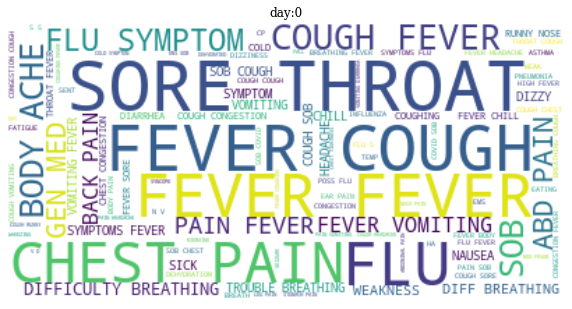

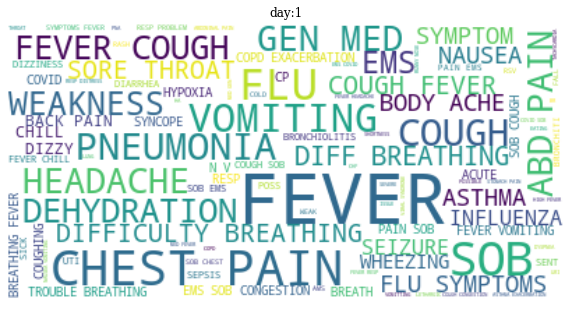

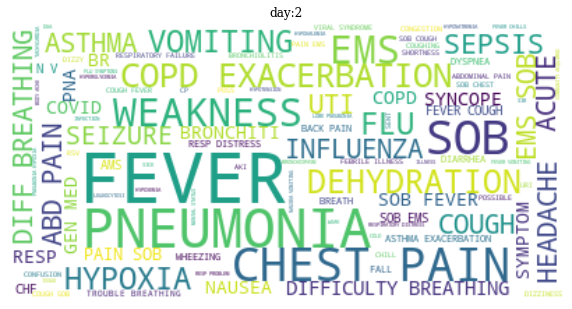

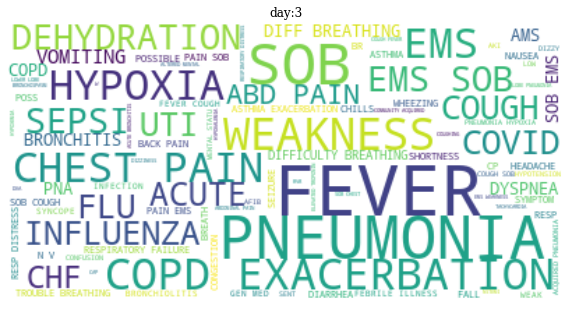

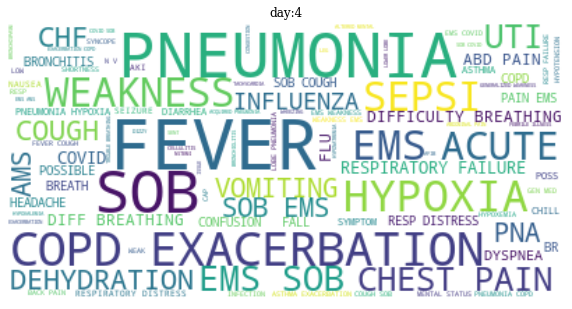

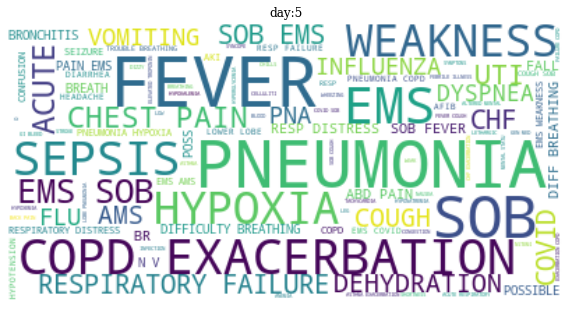

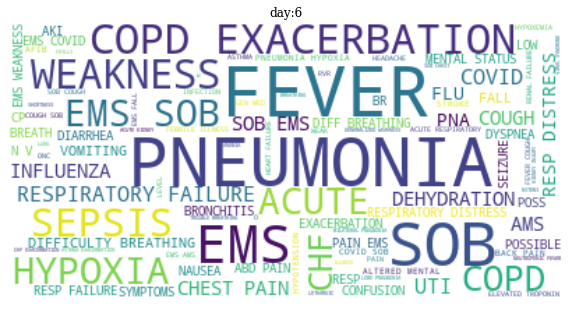

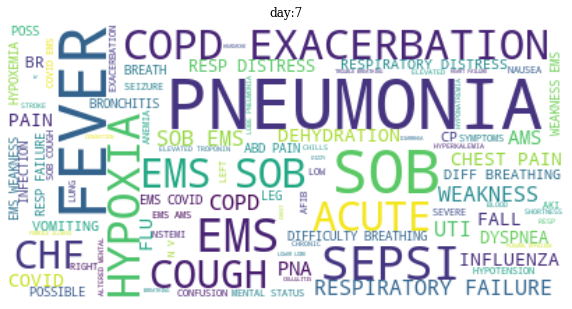

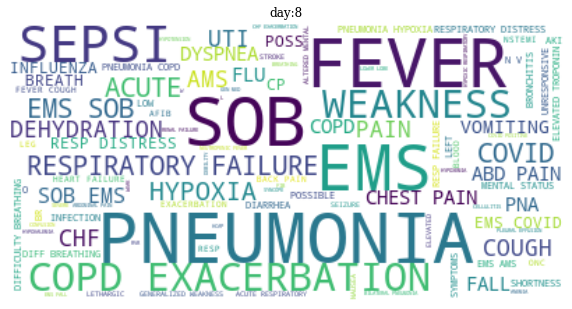

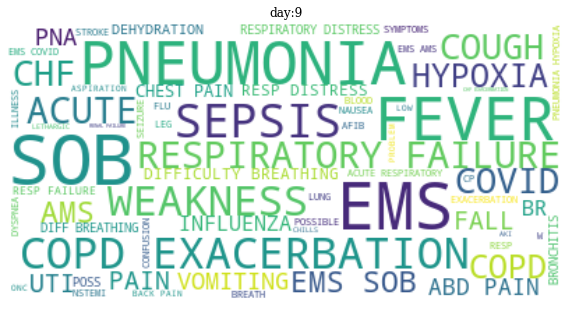

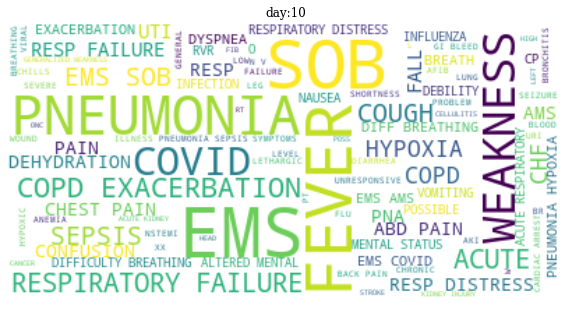

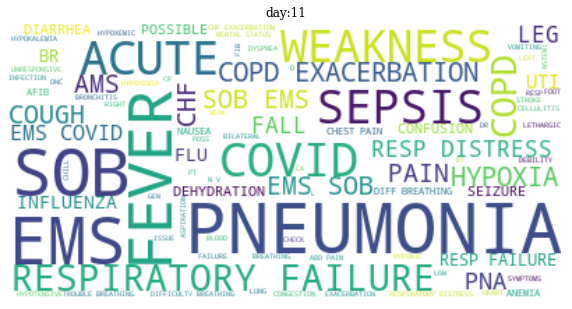

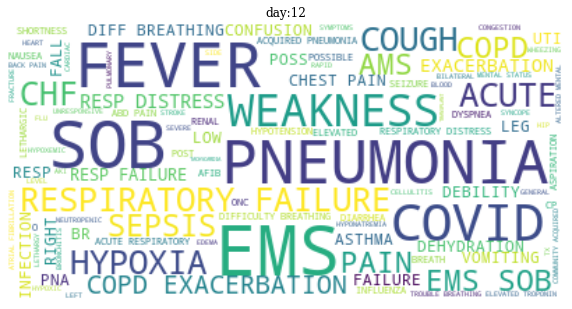

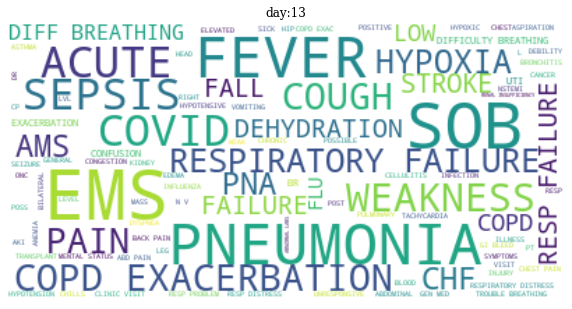

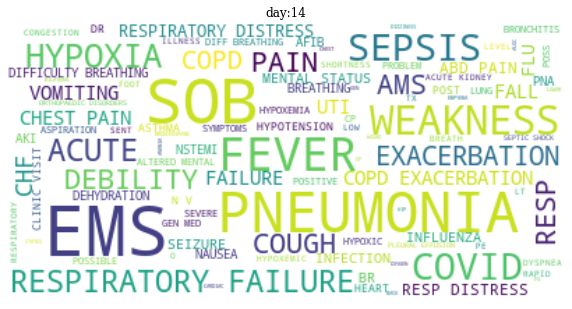

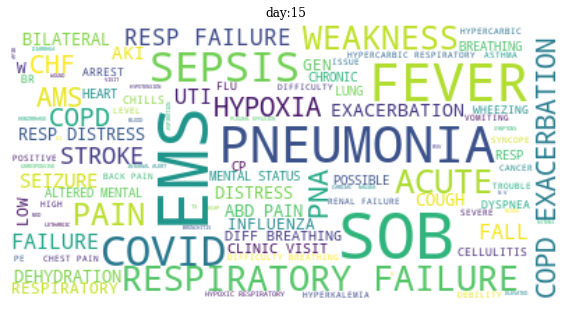

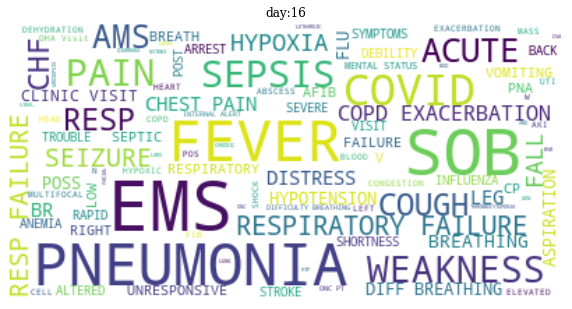

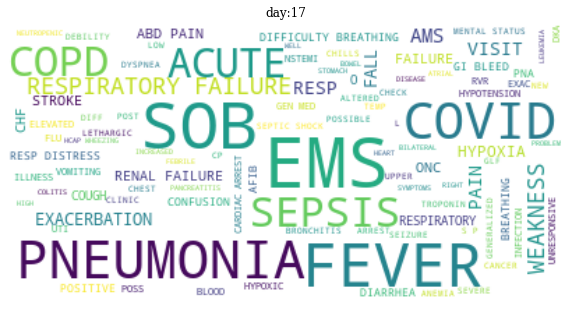

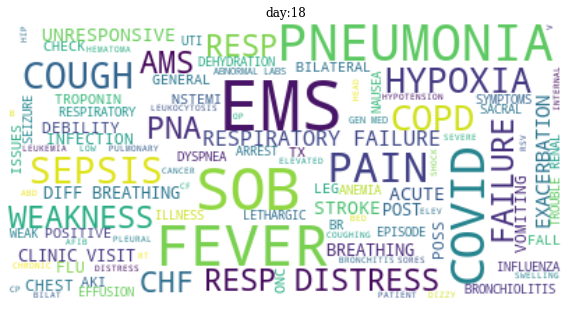

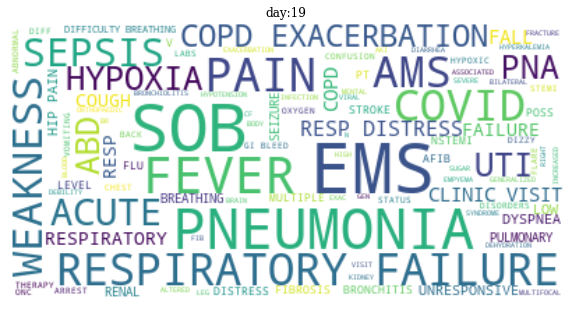

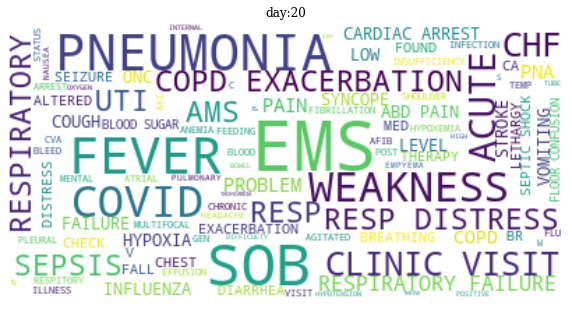

In [184]:
## complaint
def print_word_cloud(day_range,complaint_dict):
    for i in range(day_range+1):
        wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate('.'.join(complaint[i]))
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f'day:{i}')
        plt.show()
        
print_word_cloud(20,complaint)

In [81]:
all_exist_ENCOUNTERS

STUDY_ID START_DATE   END_DATE   ENC_TYPE            LOCATION  \
0        5222075010 2011-12-27 2011-12-30  INPATIENT           SHADYSIDE   
1        5222788993 2011-09-12 2011-09-15  EMERGENCY           SHADYSIDE   
2        5222734234 2011-09-23 2011-09-23  EMERGENCY           SHADYSIDE   
3        5222990158 2011-11-24 2011-11-24  EMERGENCY           SHADYSIDE   
6        5222420770 2011-01-10 2011-01-10  EMERGENCY       ST. MARGARETS   
...             ...        ...        ...        ...                 ...   
1995546  5220663102 2021-01-02 2021-01-02  EMERGENCY           SHADYSIDE   
1995591  5221224173 2021-01-01 2021-01-05  INPATIENT          MCKEESPORT   
1995656  5221925756 2021-01-01 2021-01-01  EMERGENCY    HORIZON SHENANGO   
1995674  5224619721 2021-01-02 2021-01-03  EMERGENCY  HORIZON GREENVILLE   
1995694  5224333899 2021-01-02 2021-01-06  INPATIENT             JAMESON   

        APPT_STATUS        ADMIT_SOURCE    HOSPITAL_SERVICE    PATIENT_TYPE  \
0               NaN  MED STAFF REFERRAL    GENERAL MEDICINE    I  INPATIENT   
1               NaN  MED STAFF REFERRAL       ENDOCRINOLOGY  EMERGENCY DEPT   
2               NaN  MED STAFF REFERRAL  EMERGENCY MEDICINE  EMERGENCY DEPT   
3               NaN  MED STAFF REFERRAL  EMERGENCY MEDICINE  EMERGENCY DEPT   
6               NaN  MED STAFF REFERRAL  EMERGENCY MEDICINE  EMERGENCY DEPT   
...             ...                 ...                 ...             ...   
1995546         NaN  MED STAFF REFERRAL  EMERGENCY MEDICINE  EMERGENCY DEPT   
1995591         NaN  MED STAFF REFERRAL   INTERNAL MEDICINE    I  INPATIENT   
1995656         NaN  MED STAFF REFERRAL  EMERGENCY MEDICINE  EMERGENCY DEPT   
1995674         NaN  MED STAFF REFERRAL  EMERGENCY MEDICINE  EMERGENCY DEPT   
1995694         NaN  MED STAFF REFERRAL   INTERNAL MEDICINE    I  INPATIENT   

                PATIENT_CLASS                             CHIEF_COMPLAINT  \
0                   Inpatient                GRAM NEGATIVE ROD BACTEREMIA   
1        Emergency Department                                         CIP   
2        Emergency Department                                FLU SYMPTOMS   
3        Emergency Department                                    POSS FLU   
6        Emergency Department                           FLU LIKE SYMPTOMS   
...                       ...                                         ...   
1995546  Emergency Department                         ONC - SINUS PROBLEM   
1995591             Inpatient                        EXTREME SOB, COVID +   
1995656  Emergency Department  DIFFICULTY SWALLOWING CONGESTION IN THROAT   
1995674  Emergency Department                                    ABD PAIN   
1995694             Inpatient                                         SOB   

        CHIEF_COMPLAINT_ONSET_DATE duration  duration_day  
0                  12/27/2011 1824   3 days             3  
1                  09/12/2011 2025   3 days             3  
2                  09/23/2011 1516   0 days             0  
3                  11/24/2011 1734   0 days             0  
6                  01/10/2011 1635   0 days             0  
...                            ...      ...           ...  
1995546             02-JAN-21 1528   0 days             0  
1995591             01-JAN-21 1752   4 days             4  
1995656             01-JAN-21 1738   0 days             0  
1995674             02-JAN-21 2209   1 days             1  
1995694             02-JAN-21 0803   4 days             4  

[166798 rows x 14 columns]

In [122]:
## distribution of PATIENT_CLASS by considering Duration

def PATIENT_CLASS_by_duration(df,class_name,days,duration ):
    n_class = df[class_name].unique()
    map_= {}

    for i,j in enumerate(n_class):
        map_[j] = i 
    init= [0]*len(n_class)
    dic = {}

    for i in range(days+1):
        dic[i]=init.copy()

    for i in range(df.shape[0]):

        duration_  = df.iloc[i,:][duration]
        if duration_ >days:
            continue
            
        cur_class = df.iloc[i,:][class_name]

        dic[duration_][map_[cur_class]]+=1
        
    return map_,dic


map_,dic = PATIENT_CLASS_by_duration(all_exist_ENCOUNTERS,'PATIENT_CLASS',20,'duration_day' )
print(map_)
dic

{'Inpatient': 0, 'Emergency Department': 1, 'Outpatient': 2, 'O': 3, 'I': 4}


{0: [604, 68729, 261, 257, 1],
 1: [4491, 17993, 204, 13, 5],
 2: [10623, 5357, 93, 10, 13],
 3: [11025, 2381, 44, 2, 20],
 4: [8869, 1127, 30, 0, 13],
 5: [6797, 543, 23, 5, 19],
 6: [5175, 293, 13, 5, 19],
 7: [3956, 179, 9, 7, 15],
 8: [3048, 99, 10, 3, 3],
 9: [2220, 55, 10, 6, 12],
 10: [1817, 38, 14, 4, 8],
 11: [1439, 21, 12, 3, 5],
 12: [1129, 18, 14, 3, 9],
 13: [941, 14, 13, 4, 4],
 14: [803, 11, 16, 7, 2],
 15: [689, 3, 15, 8, 2],
 16: [531, 5, 18, 3, 3],
 17: [384, 3, 10, 7, 1],
 18: [351, 6, 10, 6, 2],
 19: [313, 2, 13, 10, 2],
 20: [266, 0, 16, 5, 2]}

In [125]:
df=pd.DataFrame(dic)
df.index = map_.keys()
df

0      1      2      3     4     5     6     7   \
Inpatient               604   4491  10623  11025  8869  6797  5175  3956   
Emergency Department  68729  17993   5357   2381  1127   543   293   179   
Outpatient              261    204     93     44    30    23    13     9   
O                       257     13     10      2     0     5     5     7   
I                         1      5     13     20    13    19    19    15   

                        8     9   ...    11    12   13   14   15   16   17  \
Inpatient             3048  2220  ...  1439  1129  941  803  689  531  384   
Emergency Department    99    55  ...    21    18   14   11    3    5    3   
Outpatient              10    10  ...    12    14   13   16   15   18   10   
O                        3     6  ...     3     3    4    7    8    3    7   
I                        3    12  ...     5     9    4    2    2    3    1   

                       18   19   20  
Inpatient             351  313  266  
Emergency Department    6    2    0  
Outpatient             10   13   16  
O                       6   10    5  
I                       2    2    2  

[5 rows x 21 columns]

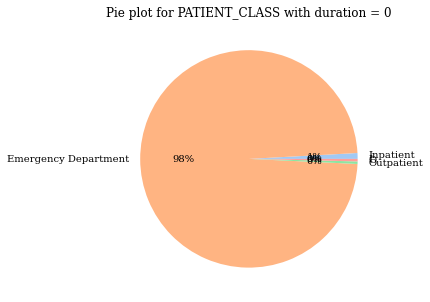

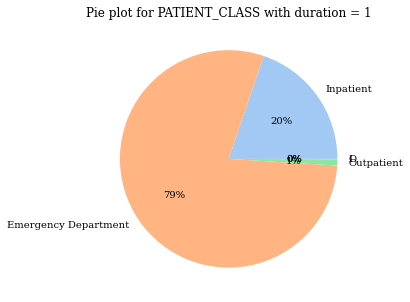

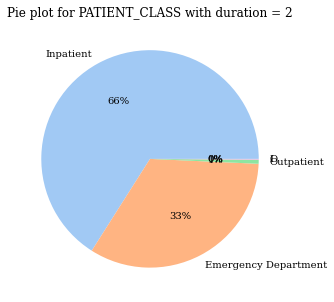

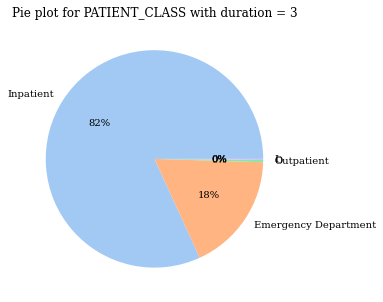

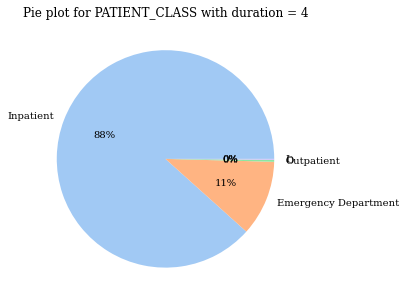

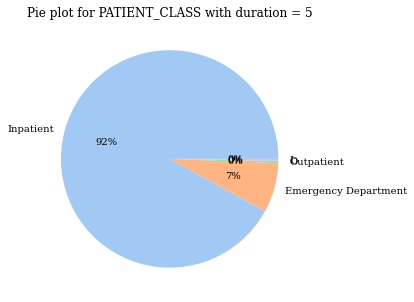

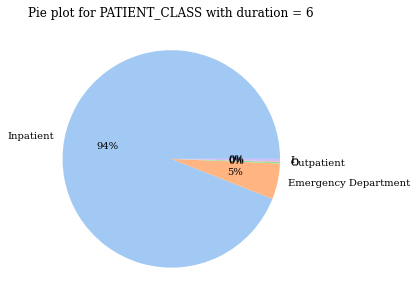

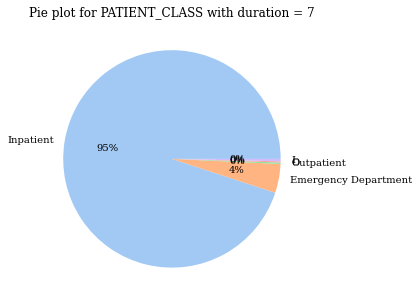

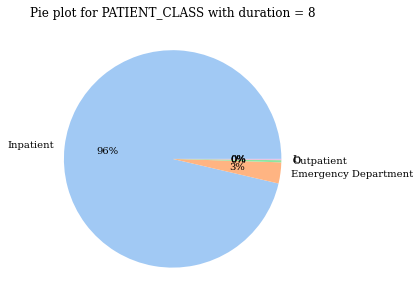

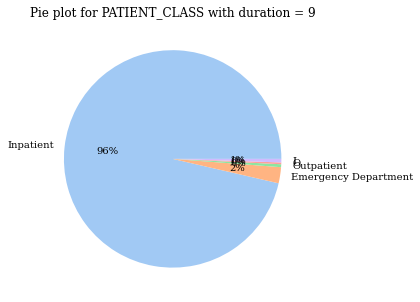

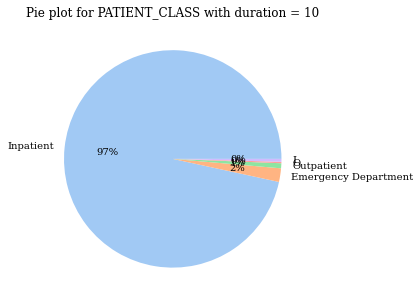

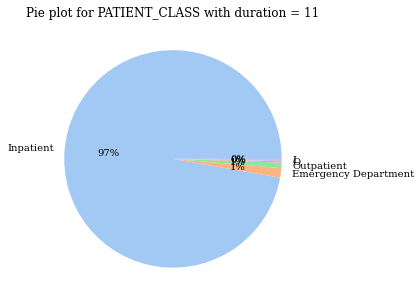

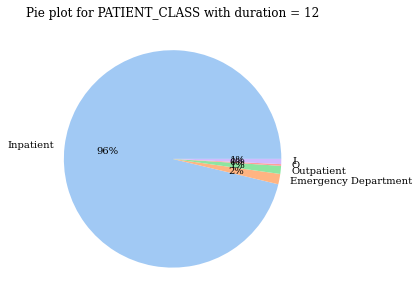

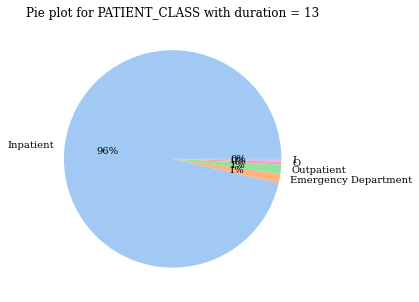

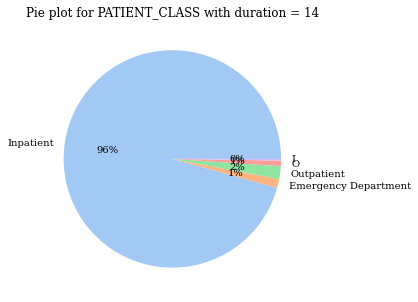

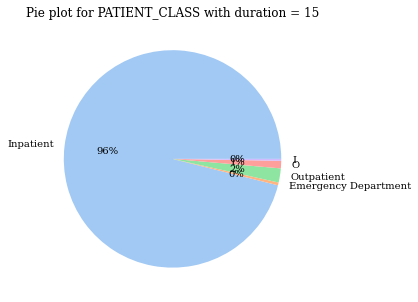

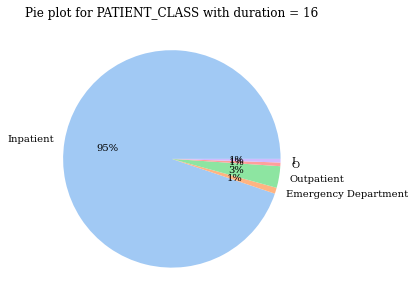

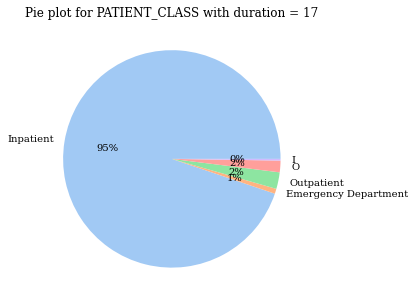

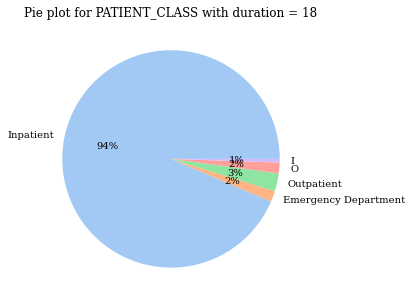

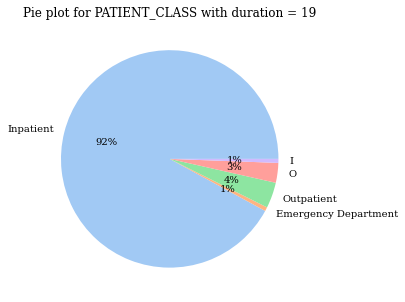

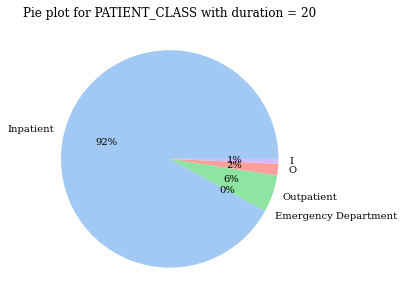

In [133]:
for i in range(21):
    plt.figure(figsize=(5, 5))
    colors = sns.color_palette('pastel')[0:5]
    plt.pie(df[i], labels = df.index, colors = colors, autopct='%.0f%%')
    plt.title(f'Pie plot for PATIENT_CLASS with duration = {i}')
    plt.show()